<a href="https://colab.research.google.com/github/Gigiasu/MAT-421/blob/main/Module_H_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

22.4 Numerical Error and Instability

There is concern in integration for ODE's for accuracy and stability.

Accuracy is defined as the schemes ability to get close to the exact solution as a function of the step size h.

Stability is its ability to keep the error from growing as it integrates foward for a time. If the error does not grow it is stable. If it does grow, or only grows some of the time, it is considered unstable.



In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 

<ipython-input-1-c8f64572e20b>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


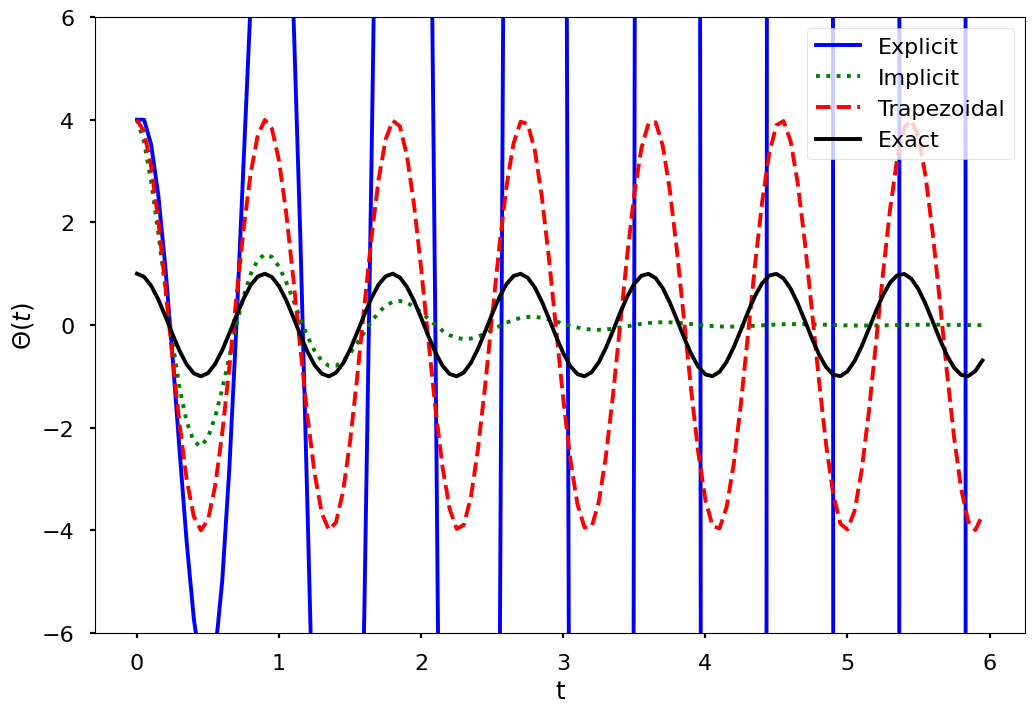

In [14]:

h = 0.05

t = np.arange(0, 6, h)

w = 7
s0 = np.array([[4], [0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-6, 6])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

22.5 Predictor-Corrector and Runge Kutta Methods

The Predictor-corrector method predicts the funcion at several points, and then uses a weighted average of the results to make corrections. 

Runge Kutta method utilizes the same principles as Euler's method by taking terms from Taylor series, but it uses more than just the first two terms. In keeping more terms, the accuracy can be improved upon

22.6 Python ODE Solvers

Let F be a function so that dS(t)/dt=F(t,S(t))  and S(t0)=S0

S(t) is an n-dimensional vector and F(t,S(t)) defines the differention equation. S0 is the inital value for S. We want S(t) to approximately satisfy the differencital equation given the initial value.



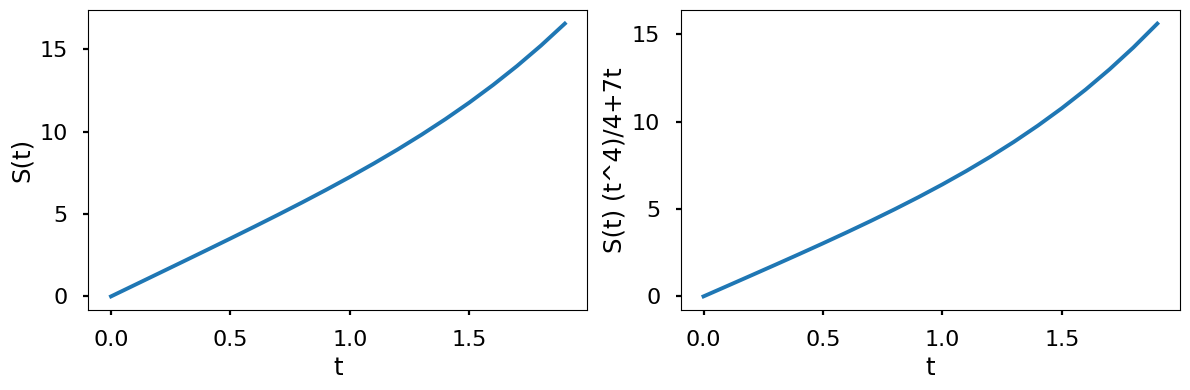

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp


%matplotlib inline

F = lambda t, s: t**3+7

t_eval = np.arange(0, 2, 0.1)
sol = solve_ivp(F, [0, 2], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) (t^4)/4+7t')
plt.tight_layout()
plt.show()